Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning) 

Import Dataset

In [3]:
df1 = pd.read_csv("D:\\Project\\Kaggle_EDA\\archive\\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Drop Unnecessary Columns

In [4]:
df2 = df1.drop(columns = ['area_type','availability','society'])
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


Drop NA Values

In [5]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df2.dropna(inplace = True)

size Standardization

In [7]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [8]:

df2['BHK'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [9]:
df2.drop(columns = ['size'] , inplace = True ,axis =1)

Total_sqft Standardization

In [10]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(1976,), dtype=object)

In [11]:


def convert_total_sqrt(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2

    try:
        return float(x)
    except:
        return None
   
df2['total_sqft'] = df2['total_sqft'].apply(lambda x:convert_total_sqrt(x))

In [12]:
df2.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


Feature Engineering 

In [13]:
df2.columns = df2.columns.str.strip()
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']

In [14]:
df2['location'] = df2['location'].apply(lambda x:x.strip())

In [15]:
loc_count = df2.groupby('location')['location'].agg('count')
loc_count

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1254, dtype: int64

In [16]:
loc_count_less = loc_count[loc_count<=10]
loc_count_less

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1017, dtype: int64

In [17]:
len(df2.location.unique())

1254

In [18]:
df2['location'] = df2.location.apply(lambda x:'other' if x in loc_count_less else x)

In [19]:
len(df2.location.unique())

238

Remove Outliers

In [20]:
desc = df2.price_per_sqft.describe()
desc = desc.apply(lambda x : '{:.0f}'.format(x))
print(desc)

count      12668
mean        6876
std        22634
min          268
25%         4243
50%         5376
75%         7143
max      2300000
Name: price_per_sqft, dtype: object


In [21]:
df2.shape

(12710, 7)

## Reoving Outlier by location which has less and more price_per_sqft than range

In [22]:
def remove_outlier(df2):
    out_df = pd.DataFrame()
    for key , subdf in df2.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >(m-std)) & (subdf.price_per_sqft <=(m+std))]
        out_df = pd.concat([out_df,reduced_df],ignore_index = True)
    return out_df

df3 = remove_outlier(df2)
df3.shape

(10817, 7)

In [23]:
df4 = df3.copy()

## Remove outlier for same location less BHK  having more price_per_sqft than more BHK

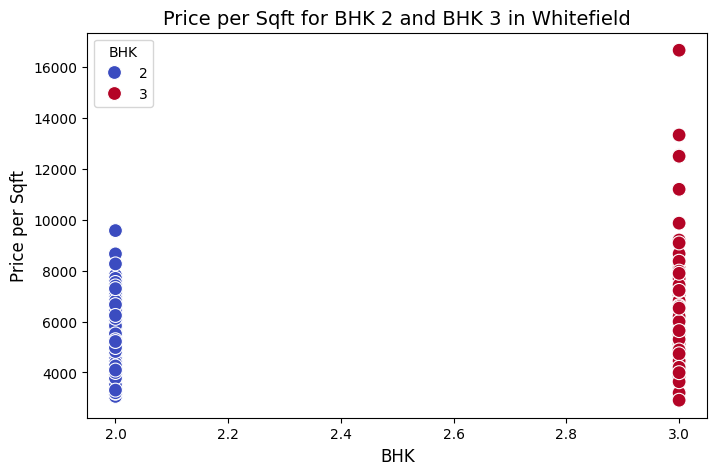

In [24]:
def plot_price_scatter(df, location):
    subdf = df[df['location'] == location]
    subdf = subdf[subdf['BHK'].isin([2, 3])]

    if subdf.empty:
        print(f"No data available for location: {location}")
        return

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='BHK', y='price_per_sqft', data=subdf, hue='BHK', palette='coolwarm', s=100)

    plt.title(f'Price per Sqft for BHK 2 and BHK 3 in {location}', fontsize=14)
    plt.xlabel('BHK', fontsize=12)
    plt.ylabel('Price per Sqft', fontsize=12)
    plt.show()

# Example usage
plot_price_scatter(df4, 'Whitefield')


In [25]:
import pandas as pd

def remove_invalid_pricing(df):
    df_sorted = df.sort_values(by=['location', 'BHK'])  # Ensure data is sorted properly
    filtered_df = pd.DataFrame()

    for location, subdf in df_sorted.groupby('location'):
        # Shift price_per_sqft for comparison with the next BHK
        subdf['next_price_per_sqft'] = subdf['price_per_sqft'].shift(-1)
        subdf['next_BHK'] = subdf['BHK'].shift(-1)
        
        # Keep only rows where price_per_sqft is not greater than the next higher BHK
        valid_rows = subdf[~((subdf['price_per_sqft'] > subdf['next_price_per_sqft']) & (subdf['BHK'] < subdf['next_BHK']))]
        
        filtered_df = pd.concat([filtered_df, valid_rows], ignore_index=True)

    return filtered_df.drop(columns=['next_price_per_sqft', 'next_BHK'])

# Apply function
df_cleaned = remove_invalid_pricing(df4)

print(df_cleaned.shape)


(10539, 7)


## Remove outlier which has more bathrooms than bedrooms 
## +2 bathrooms more it's ok but more than it not.

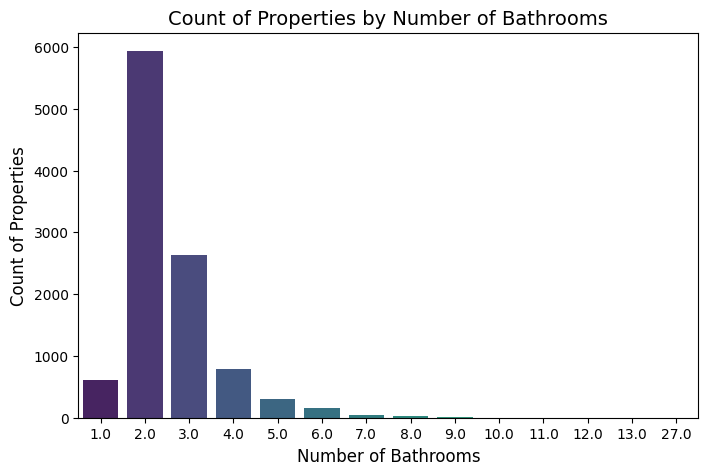

In [26]:
plt.figure(figsize=(8, 5))
    
# Count number of occurrences of each bathroom count
bathroom_counts = df_cleaned['bath'].value_counts().sort_index()

# Plot bar chart
sns.barplot(x=bathroom_counts.index, y=bathroom_counts.values, palette='viridis')

# Labels and title
plt.xlabel("Number of Bathrooms", fontsize=12)
plt.ylabel("Count of Properties", fontsize=12)
plt.title("Count of Properties by Number of Bathrooms", fontsize=14)

# Show plot
plt.show()


In [27]:
df_cleaned[df_cleaned.bath > (df_cleaned.BHK +2)]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1446,Chamrajpet,1500.0,9.0,3.0,230.0,6,15333.333333
1576,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6552,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
9691,other,2400.0,6.0,2.0,775.0,3,32291.666667
10389,other,11338.0,9.0,1.0,1000.0,6,8819.897689
10432,other,1200.0,9.0,3.0,122.0,6,10166.666667
10498,other,990.0,12.0,0.0,120.0,8,12121.212121


In [28]:
df_cleaned[df_cleaned.bath < (df_cleaned.BHK +2)]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
1,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
2,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
3,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
4,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,15018.181818
...,...,...,...,...,...,...,...
10534,other,1178.0,9.0,1.0,75.0,9,6366.723260
10535,other,5000.0,9.0,3.0,360.0,11,7200.000000
10536,other,1200.0,11.0,0.0,170.0,11,14166.666667
10537,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [29]:
df5 = df_cleaned.copy()

In [30]:
df5 = df5[df5.location != 'other']

In [31]:
location_dummies = pd.get_dummies(df5['location']).astype(int)
location_dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Finding Best Model with best HyperParameters

In [32]:
location_dummies.shape

(7828, 237)

In [33]:
df5.shape

(7828, 7)

In [34]:
df6 = pd.concat([df5 , location_dummies] , axis = 1)

In [35]:
df6.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,15018.181818,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X = df6.drop(columns = ['price','price_per_sqft','location','balcony'])
y = df6.price

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4896,1710.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1737,1829.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6108,1691.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1158,1718.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4689,2236.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
models = {
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }),
    'Ridge': (Ridge(), {
        'alpha': [0.1, 1, 10]
    }),
    'SVR': (SVR(), {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10]
    }),
    'DecisionTree': (DecisionTreeRegressor(), {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10]
    })
}

In [41]:
def find_best_model(X_train, y_train):
    results = []
    
    for model_name, (model, params) in models.items():
        try:
            grid_search = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
            grid_search.fit(X_train, y_train)
        
            results.append({
                'Model': model_name,
                'Best Score': grid_search.best_score_,
                'Best Params': grid_search.best_params_
            })
        except Exception as e:
            print(f"Error with model {model_name}: {e}")

    return results

In [84]:
best_models = find_best_model(X_train, y_train)
print(pd.DataFrame(best_models))

          Model  Best Score                                   Best Params
0  RandomForest    0.713525       {'max_depth': None, 'n_estimators': 50}
1         Ridge    0.623348                                {'alpha': 0.1}
2           SVR    0.226690                 {'C': 10, 'kernel': 'linear'}
3  DecisionTree    0.601510  {'max_depth': None, 'min_samples_split': 10}


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [276]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)

In [274]:
cross_val_score(Lasso() , X,y , cv = cv)

array([0.58280204, 0.64553716, 0.66233993, 0.6512528 , 0.69153724])

In [261]:
cross_val_score(Lasso(alpha = 5),X,y,cv=5)

array([0.49269412, 0.61357838, 0.67560565, 0.59191232, 0.78555391])

In [275]:
cross_val_score(Lasso(alpha = 5),X,y,cv=cv)

array([0.57155204, 0.64624057, 0.65091254, 0.64067136, 0.68244516])

In [263]:
from sklearn.ensemble import RandomForestRegressor
cross_val_score(RandomForestRegressor(),X,y,cv=5)

array([0.47547673, 0.51837615, 0.66670434, 0.51418842, 0.65386482])

In [148]:
cross_val_score(RandomForestRegressor(max_depth = 100),X,y,cv=5)

array([0.38023094, 0.80282793, 0.53633508, 0.49007177, 0.57590412])

In [264]:
from sklearn.linear_model import Ridge
cross_val_score(Ridge() , X , y , cv = 5)

array([0.49628285, 0.59837789, 0.69055067, 0.58107164, 0.76524445])

In [273]:
cross_val_score(Ridge(alpha = 10) , X , y , cv = cv)

array([0.72499013, 0.81607388, 0.78373894, 0.77490852, 0.7629489 ])

In [43]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
cross_val_score(LinearRegression() , X , y , cv = cv )

array([0.80405327, 0.83722549, 0.82325232, 0.78792556, 0.76659394])

## Modeltraining

In [44]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [45]:
import numpy as np

def predict_price(location, sqft, bath, BHK):
    # Creating a zero-filled array with the same length as feature columns
    x = np.zeros(len(X.columns))

    # Assigning input values (Make sure these match the correct feature order in X)
    x[0] = sqft
    x[1] = bath
    x[3] = BHK  

    # Finding the correct index of the location column
    if location in X.columns:
        loc_index = X.columns.get_loc(location)  # Correct way to get the column index
        x[loc_index] = 1  # Assigning 1 to the correct location column

    # Predicting price
    return model.predict([x])[0]



In [46]:
predict_price('Sarjapur',5000,1,2) ## ('location' , 'Sqft' , 'Bathrooms' , 'BHK')

np.float64(653.1638899572266)

In [47]:
predict_price('7th Phase JP Nagar',1000,2,2) ## A small 2 BHK apartment is usually around 800–1200 sqft.

np.float64(341.21007888304155)

In [48]:
## 1 foot (ft) = 30.48 centimeters (cm)
## 1000 foot (ft) = 30480 centimeters (cm) = 304.8 meter . 
## 20 ft * 50 ft = 6.096 m * 15.24 m ( its also large area)

In [49]:
predict_price('7th Phase JP Nagar',1000,3,3)

np.float64(478.54559777831423)

In [50]:
predict_price('7th Phase JP Nagar',1000,3,1)

np.float64(209.92451155300208)

In [51]:
predict_price('Whitefield',5000,1,2)

np.float64(682.7192201736805)

In [52]:
predict_price('Whitefield',1000,2,2)

np.float64(340.5998362863536)

In [53]:
predict_price('Whitefield',1000,3,3)

np.float64(477.93535518162616)

In [55]:
import pickle
with open("home_price_model.pkl","wb") as f:
    pickle.dump(model , f)

In [57]:
import json
columns = {
    "data_columns" : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))